In [1]:
pip install cartopy cmocean

Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotting_functions as pf
import xarray as xr
import cmocean
import numpy as np


ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [3]:
min_lonGS = 140
min_latGS = 25
max_lonGS = 170
max_latGS = 45

In [ ]:
clf="https://s3.waw3-1.cloudferro.com/ORCA36/ORCA36-T426a_1hAV_20180101-20180101_tos.zarr"
ds = xr.open_dataset(clf,engine='zarr')
mask_lon = (ds.nav_lon >= min_lonGS) & (ds.nav_lon <= max_lonGS)
mask_lat = (ds.nav_lat >= min_latGS) & (ds.nav_lat <= max_latGS)
dsGS = ds.where(mask_lon & mask_lat, drop=True)
meanSST=dsGS.tos.mean(dim='time_counter')
data=meanSST

In [11]:
for m in np.arange(1,4):
    print("month"+str(m))
    
    if m == 1:
        t0=2
    else:
        t0=1
    if m == 1 or m == 3:
        tf=31
    else:
        tf=28
    
    for t in np.arange(t0,tf+1):
        print("day"+str(t))
        tt=str(t).zfill(2)
        mm=str(m).zfill(2)
        clf="https://s3.waw3-1.cloudferro.com/ORCA36/ORCA36-T426a_1hAV_2018"+mm+tt+"-2018"+mm+tt+"_tos.zarr"
        ds = xr.open_dataset(clf,engine='zarr')
        mask_lon = (ds.nav_lon >= min_lonGS) & (ds.nav_lon <= max_lonGS)
        mask_lat = (ds.nav_lat >= min_latGS) & (ds.nav_lat <= max_latGS)
        dsGS = ds.where(mask_lon & mask_lat, drop=True)
        meanSST=dsGS.tos.mean(dim='time_counter')
        data=xr.concat([data, meanSST], dim="time_counter")

month1
day2
day3
day4
day5
day6
day7
day8
day9
day10
day11
day12
day13
day14
day15
day16
day17
day18
day19
day20
day21
day22
day23
day24
day25
day26
day27
day28
day29
day30
day31
month2
day1
day2
day3
day4
day5
day6
day7
day8
day9
day10
day11
day12
day13
day14
day15
day16
day17
day18
day19
day20
day21
day22
day23
day24
day25
day26
day27
day28
month3
day1
day2
day3
day4
day5
day6
day7
day8
day9
day10
day11
day12
day13
day14
day15
day16
day17
day18
day19
day20
day21
day22
day23
day24
day25
day26
day27
day28
day29
day30
day31


In [12]:
data

<xarray.DataArray 'tos' (time_counter: 90, y: 922, x: 1082)> Size: 359MB
array([[[      nan,       nan,       nan, ..., 24.80026 ,       nan,
               nan],
        [24.997366, 25.004816, 24.9943  , ..., 24.805079,       nan,
               nan],
        [24.96534 , 24.949638, 24.927958, ..., 24.81104 ,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 24.985502,       nan,
               nan],
        [24.724268, 24.79656 , 24.85655 , ..., 25.002777,       nan,
               nan],
        [24.770477, 24.833366, 24.887396, ..., 25.018541,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ..., 22.538832,       nan,
               nan],
        [22.858246, 22.806587, 22.746576, ..., 22.50698 ,       nan,
               nan],
        [22.896431, 22.851557, 22.79988 , ..., 22.487562,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 4MB 24.99 24.99 24.99 24.99 ... 45.95 45.95 45.95
    nav_lon  (y, x) float32 4MB 140.0 140.1 140.1 140.1 ... 169.9 169.9 170.0
Dimensions without coordinates: time_counter, y, x

In [15]:
dataset=data.to_dataset(name='daily_mean_sst_KU')

In [17]:
dataset.to_netcdf(path='daily_mean_sst_KU.nc',mode='w')


In [4]:
data=xr.open_dataset('daily_mean_sst_KU.nc')

In [5]:
data

<xarray.Dataset> Size: 367MB
Dimensions:            (y: 922, x: 1082, time_counter: 90)
Coordinates:
    nav_lat            (y, x) float32 4MB ...
    nav_lon            (y, x) float32 4MB ...
Dimensions without coordinates: y, x, time_counter
Data variables:
    daily_mean_sst_KU  (time_counter, y, x) float32 359MB ...

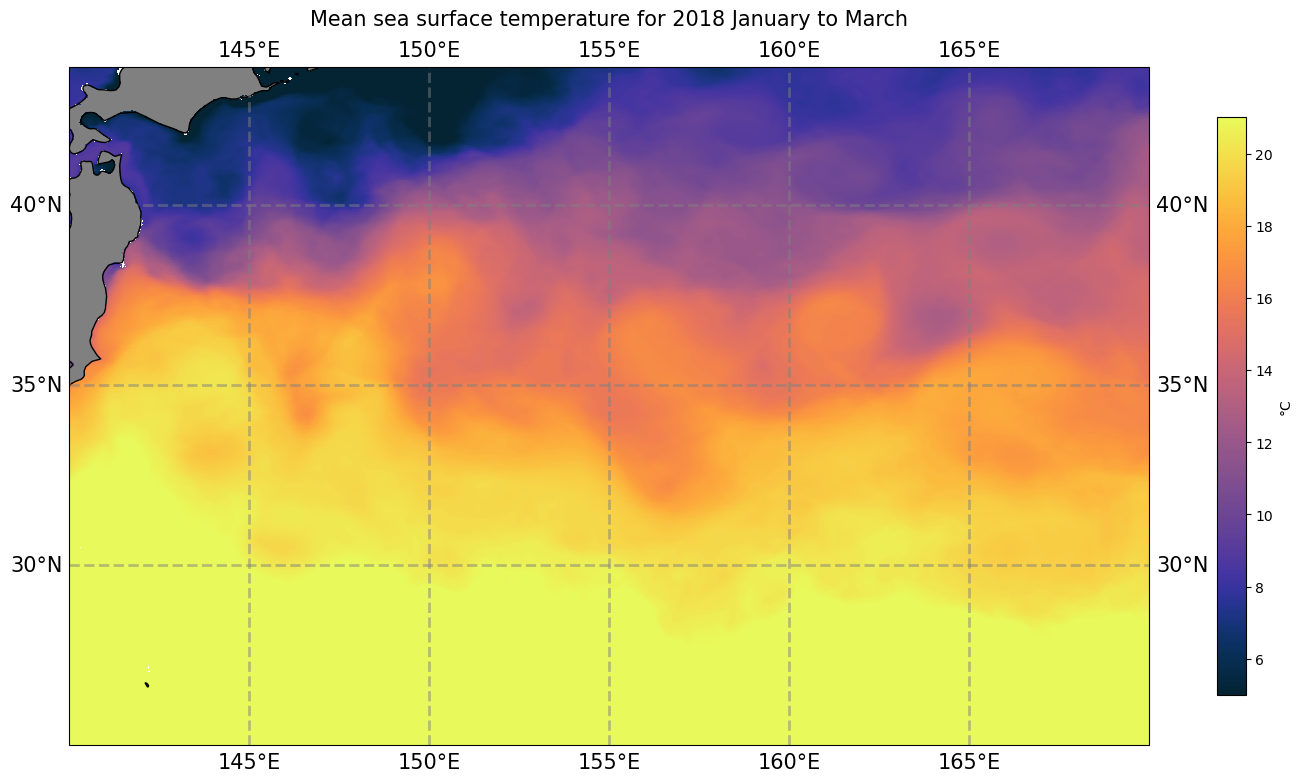

In [7]:
pf.map_mean_GS_ORCA36(data.daily_mean_sst_KU.mean(dim='time_counter'),data.nav_lon,data.nav_lat,'Mean sea surface temperature for 2018 January to March', '°C', 5, 21, cmocean.cm.thermal,"ORCA36_SST_KU_201801-03.png",min_lonGS, max_lonGS, min_latGS, max_latGS)

